<a href="https://colab.research.google.com/github/luxc1101/Data-Structures-Algorithms/blob/main/Algorithm_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Joma Class Algorithm Questions

the class link:
https://www.jomaclass.com/products/data-structures-and-algorithms-in-progress/categories/3298212/posts/11010634


## Distribute Bonuses

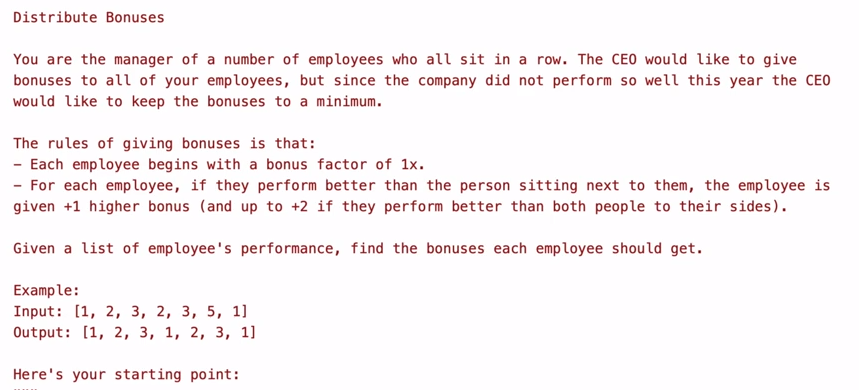

In [ ]:
def getBonuses (performance):
  count = len(performance)
  bonus = [1]*count

  for i in range(1,count):
    if performance[i-1] < performance[i]:
      bonus[i] = bonus[i-1] + 1
  for i in range(count-2,-1,-1):
    if performance[i]> performance[i+1]:
      bonus[i] = max(bonus[i],bonus[i+1]+1)
    
  return bonus


In [ ]:
performance = [1,2,3,2,3,5,1]
performance = [4,3,2,2,3,1]
getBonuses(performance)

[3, 2, 1, 1, 2, 1]

##Swap Every Two Nodes in a Linked List
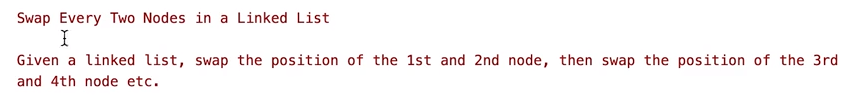

In [ ]:
class Node:
  def __init__(self, value, next = None):
    self.value = value
    self.next = next

  def __repr__(self):
    return f"{self.value}, ({self.next.__repr__()})"


In [ ]:
linked_l = Node(2, Node(1, Node(4, Node(3, Node(5)))))

In [ ]:
# plot linked list
head = linked_l
curr = head
while curr is not None:
  print('current value: {}'.format(curr.value))
  print('next: {}'.format(curr.next))
  curr = curr.next

current value: 2
next: 1, (4, (3, (5, (None))))
current value: 1
next: 4, (3, (5, (None)))
current value: 4
next: 3, (5, (None))
current value: 3
next: 5, (None)
current value: 5
next: None


In [ ]:
swap_every_two(linked_l)

1, (2, (3, (4, (5, (None)))))

In [ ]:
def swap_every_two(linked_l):
  head = linked_l
  curr = head

  while curr is not None and curr.next is not None:
    curr.value, curr.next.value = curr.next.value, curr.value
    curr = curr.next.next
  return linked_l

## H Index
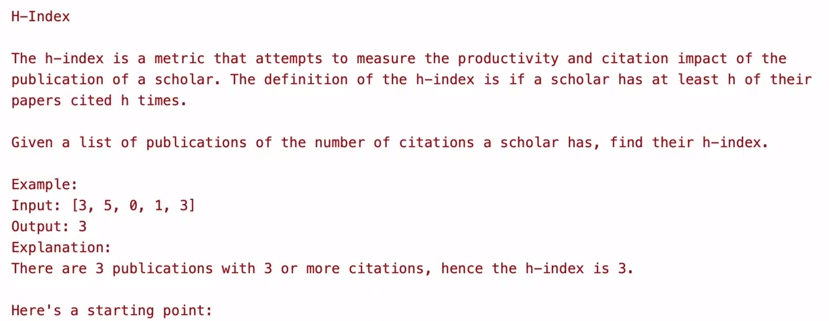

In [ ]:
def selection_sort(publications):
  n = len(publications)
  for i in range(n-1):
    max = i
    for j in range(i+1,n):
      if publications[max]<publications[j]:
        max = j

    temp = publications[i]
    publications[i]=publications[max]
    publications[max] = temp

  return publications

def h_index1(publications):
  publications = selection_sort(publications)
  print(publications)
  n = len(publications)
  cita = 1
  for i in range(n):
    if publications[i] < cita:
      return cita-1
    cita += 1 


In [ ]:
publications = [3,5,0,1,3]
h_index1(publications)

[5, 3, 3, 1, 0]


3

In [ ]:
def h_index2(publications):
  n = len(publications)
  citations = [0]*(n+1)
  
  for pub in publications:
    if pub<n:
      citations[pub] +=1
    else:
      citations[n] +=1
  print(citations)
  total = 0
  i = n
  while i>=0:
    total += citations[i]
    if total >= i:
      return total
    i-=1

In [ ]:
h_index2(publications)

[1, 1, 0, 2, 0, 1]


3

##Shortest Unique Prefix
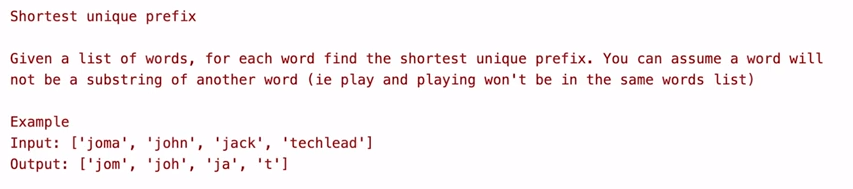

In [ ]:
class Node:
  def __init__(self):
    self.count = 0
    self.children = {}

In [ ]:
class Trie:
  def __init__(self):
    self.root = Node()
  
  def insert(self, word):
    curr_node = self.root
    for c in word:
      if c not in curr_node.children:
        curr_node.children[c] = Node()
      curr_node = curr_node.children[c]
      curr_node.count += 1

  def unique_prefix(self, word):
    curr_node = self.root
    prefix = ''

    for c in word:
      if curr_node.count == 1:
        return prefix
      else:
        curr_node = curr_node.children[c]
        prefix += c

    return prefix 

In [ ]:
words = ['jooma','john','jack', 'techlead']

In [ ]:
trie = Trie()
for word in words:
  trie.insert(word)

In [ ]:
for word in words:
  curr_node = trie.root
  for c in word:
    curr_node = curr_node.children[c]
    print('{},{},{}'.format(c,curr_node, curr_node.count))

j,<__main__.Node object at 0x7f408948ea90>,3
o,<__main__.Node object at 0x7f408948e410>,2
o,<__main__.Node object at 0x7f408948eb50>,1
m,<__main__.Node object at 0x7f408948e910>,1
a,<__main__.Node object at 0x7f408948e790>,1
j,<__main__.Node object at 0x7f408948ea90>,3
o,<__main__.Node object at 0x7f408948e410>,2
h,<__main__.Node object at 0x7f408948e110>,1
n,<__main__.Node object at 0x7f408948e050>,1
j,<__main__.Node object at 0x7f408948ea90>,3
a,<__main__.Node object at 0x7f408951fb90>,1
c,<__main__.Node object at 0x7f408951f590>,1
k,<__main__.Node object at 0x7f408951fc10>,1
t,<__main__.Node object at 0x7f408951f0d0>,1
e,<__main__.Node object at 0x7f408951f410>,1
c,<__main__.Node object at 0x7f408951f490>,1
h,<__main__.Node object at 0x7f408951f290>,1
l,<__main__.Node object at 0x7f408951f950>,1
e,<__main__.Node object at 0x7f408951f750>,1
a,<__main__.Node object at 0x7f408951f090>,1
d,<__main__.Node object at 0x7f40895b7e10>,1


In [ ]:
def shortest_unique_prefix(words):
  trie = Trie()

  for word in words:
    trie.insert(word)
  unique_pref = []
  for word in words:
    unique_pref.append(trie.unique_prefix(word))
  
  return unique_pref

In [ ]:
shortest_unique_prefix(words)

['joo', 'joh', 'ja', 't']

## Running Median
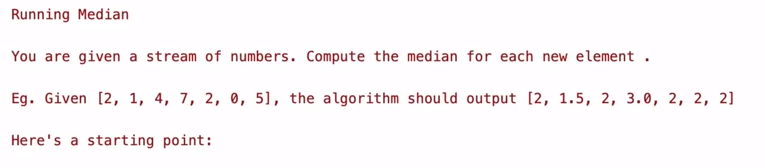

### Naive way


In [ ]:
def add_number(arr,n):
  arr.append(n)
  return arr

def print_median(arr):
  sorted_arr = sorted(arr)
  n = len(arr)

  if n % 2 == 0: # for even number
    return (sorted_arr[n//2] + sorted_arr[n//2-1])/2
  else: # for uneven number
    return sorted_arr[n//2]

def runging_median(arr):
    empty_arr = []
    if len(arr) == 0:
      print(-1)
      return
    elif len(arr) == 1:
      print(arr[0])
      return
    else:
      for n in arr:
        arr = add_number(empty_arr,n)
        median = print_median(arr)
        print(median) 


In [ ]:
arr = [2,1,4,7,2,0,7]
# arr = [1]
runging_median(arr)

2
1.5
2
3.0
2
2.0
2


## Naive way 2

In [189]:
def binarySearch_posi(arr,l,r,n):
  while l<=r:
    mid = (l + r)//2
    if n>max(arr):
      return len(arr)
    elif n<min(arr):
      return 0
    elif arr[mid] <= n and arr[mid+1]>n:
      return mid+1
    elif arr[mid] < n:
      l = mid+1
    else:
      r = mid-1

def add_number(arr,n): 
  if len(arr) == 0:
    arr.append(n)
  else:
    posi = binarySearch_posi(arr,0,len(arr)-1,n)
    arr.insert(posi,n)
  return arr

def print_median(arr):
  n = len(arr)

  if n % 2 == 0: # for even number
    return (arr[n//2] + arr[n//2-1])/2
  else: # for uneven number
    return arr[n//2]

def runging_median(arr):
    sorted_arr = []
    if len(arr) == 0:
      print(-1)
      return
    elif len(arr) == 1:
      print(arr[0])
      return
    else:
      for n in arr:
        sorted_arr = add_number(sorted_arr,n)
        median = print_median(sorted_arr)
        print(median) 

In [192]:
arr = [2,1,4,7,2,0,4]
runging_median(arr)

2
1.5
2
3.0
2
2.0
2
